In [33]:
al1 = {'a': ['b', 'd'], 'b': ['a', 'c', 'd'],
       'c': ['b', 'd'], 'd': ['a', 'c', 'b']}

In [41]:
def vertex_count(graph):
    return len(graph.keys())

def edge_count(graph):
    count = 0
    for key in graph:
        count += len(graph[key])
    return count//2

def vertices(graph):
    return list(graph.keys())

def edges(graph):
    result = []
    for u in graph:
        for v in graph[u]:
            #print("(", u, v,")", result)
            if (u, v) not in result and (v, u) not in result:
                result.append((u, v))
    return result

def get_edge(graph, u, v):
    #return v in graph[u] and u in graph[v]
    """
    if v in graph[u] and u in graph[v]:
        return True
    else:
        return False
    """
    x = v in graph[u]
    y = u in graph[v]
    return x and y

def degree(graph, u):
    return len(graph[u])

def incident_edges(graph, u):
    result = []
    for v in graph[u]:
        result.append((u, v))
    return result

def insert_vertex(graph, u):
    if u not in graph:
        graph[u] = []
    return graph

def remove_vertex(graph, u):
    for v in graph[u]:
        graph[v].remove(u)
    del graph[u]
    return graph

def insert_edge(graph, u, v):
    if u not in vertices(graph) or v not in vertices(graph):
        return graph
    if not get_edge(graph, u, v):
        graph[u].append(v)
        graph[v].append(u)
    return graph

def remove_edge(graph, u, v):
    if not get_edge(graph, u, v):
        return graph
    graph[u].remove(v)
    graph[v].remove(u)
    return graph


In [42]:
print(vertex_count(al1))
print(edge_count(al1))
print(vertices(al1))
print(edges(al1))
print(degree(al1, 'a'))
print(degree(al1, 'b'))
print(incident_edges(al1, 'a'))
print(incident_edges(al1, 'b'))
print(insert_vertex(al1, 'e'))
#print(remove_vertex(al1, 'c'))
print(insert_edge(al1, 'a', 'c'))
print(remove_edge(al1, 'a', 'd'))

5
6
['a', 'b', 'c', 'd', 'e']
[('a', 'b'), ('a', 'd'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('c', 'd')]
3
3
[('a', 'b'), ('a', 'd'), ('a', 'c')]
[('b', 'a'), ('b', 'c'), ('b', 'd')]
{'a': ['b', 'd', 'c'], 'b': ['a', 'c', 'd'], 'c': ['b', 'd', 'a'], 'd': ['a', 'c', 'b'], 'e': []}
{'a': ['b', 'd', 'c'], 'b': ['a', 'c', 'd'], 'c': ['b', 'd', 'a'], 'd': ['a', 'c', 'b'], 'e': []}
{'a': ['b', 'c'], 'b': ['a', 'c', 'd'], 'c': ['b', 'd', 'a'], 'd': ['c', 'b'], 'e': []}


In [8]:
al1.values()

dict_values([['b', 'd'], ['a', 'c', 'd'], ['b', 'd'], ['a', 'c', 'b']])

In [12]:
set1 = {('a', 'b'), ('b', 'a')}

In [13]:
set1

{('a', 'b'), ('b', 'a')}

In [18]:
'c' in al1['b']

True

In [19]:
'b' in al1['c']

True

In [20]:
'c' in al1['b'] and 'b' in al1['c']

True

### Implement the Python function <code>degrees(graph)</code> that returns the degree of every node in the graph.

In [23]:
def degrees(graph):
    result = dict()
    for u in graph:
        result[u] = degree(graph, u)
    return result

In [24]:
degrees(al1)

{'a': 2, 'b': 3, 'c': 2, 'd': 3}

### Using the Python function <code>insert_vertex()</code> create a graph consisting of the five vertices [10, 20, 30, 40, 50].

In [31]:
mylist = [10, 20, 30, 40, 50]
al2 = dict()
for node in mylist:
    insert_vertex(al2, node)

In [32]:
al2

{10: [], 20: [], 30: [], 40: [], 50: []}

### Using the Python functions <code>insert_vertex()</code> and <code>insert_edge()</code> create a graph whose vertices are [100, 200, 300, 400, 500]. The graph must be complete.

In [73]:
mylist = [100, 200, 300, 400, 500]
al3 = dict()
for node in mylist:
    insert_vertex(al3, node)
for node1 in vertices(al3):
    for node2 in vertices(al3):
        if node1 != node2:
            insert_edge(al3, node1, node2)


In [74]:
al3

{100: [200, 300, 400, 500],
 200: [100, 300, 400, 500],
 300: [100, 200, 400, 500],
 400: [100, 200, 300, 500],
 500: [100, 200, 300, 400]}

In [38]:
import networkx as nx

In [39]:
G = nx.from_dict_of_lists(al3)

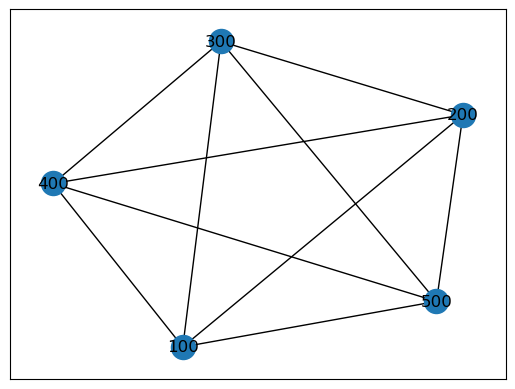

In [47]:
nx.draw_networkx(G, with_labels=True)

### Using the function <code>remove_edge()</code> remove all the edges incident in node 100 of the previous task.

In [63]:
for edge in incident_edges(al3, 100):
    print(edge[0], edge[1])
    remove_edge(al3, edge[0], edge[1])

100 200
100 300
100 400
100 500


In [64]:
al3

{100: [],
 200: [300, 400, 500],
 300: [200, 400, 500],
 400: [200, 300, 500],
 500: [200, 300, 400]}

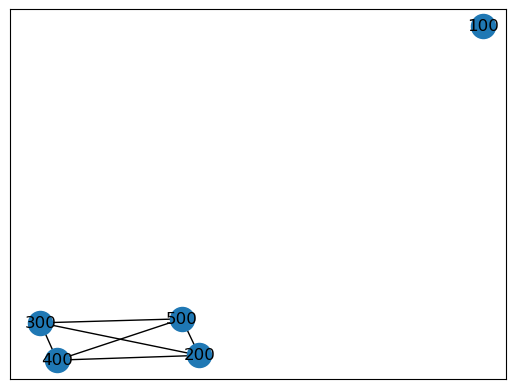

In [60]:
G = nx.from_dict_of_lists(al3)
nx.draw_networkx(G, with_labels=True)

In [75]:
al3[100]

[200, 300, 400, 500]

In [76]:
for node in al3[100]:
    print(100, node, al3[100])
    remove_edge(al3, 100, node)
    print(al3)
print(al3)

100 200 [200, 300, 400, 500]
{100: [300, 400, 500], 200: [300, 400, 500], 300: [100, 200, 400, 500], 400: [100, 200, 300, 500], 500: [100, 200, 300, 400]}
100 400 [300, 400, 500]
{100: [300, 500], 200: [300, 400, 500], 300: [100, 200, 400, 500], 400: [200, 300, 500], 500: [100, 200, 300, 400]}
{100: [300, 500], 200: [300, 400, 500], 300: [100, 200, 400, 500], 400: [200, 300, 500], 500: [100, 200, 300, 400]}
